Common initialization

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Create dummy dataset

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)


### DBSCAN Algorithm
(density-based spatial clustering for applications with noise)


The DBSCAN algorithm takes a different approach from $k$-means. Rather than having to provide the number of clusters, $k$, you define parameters related to _neighborhoods_ and _target density_.

The first important concept in DBSCAN is that of an **$\epsilon$-neighborhood**.

Consider any point $p$. The $\epsilon$-neighborhood of $p$ is the set of all points within a distance of $\epsilon$ from $p$. That is, if $\{\hat{x}_0, \hat{x}_1, \ldots, \hat{x}_{m-1}\}$ is a collection of $m$ data points, then the $\epsilon$-neighborhood centered at $p$ is

$$
  N_{\epsilon}(p) = \{\hat{x}_i : \|\hat{x}_i - p\|_2 \leq \epsilon\},
$$

where the measure of distance is Euclidean (i.e., the two-norm). Notice that this definition would _include_ the point $p$ if $p$ is one of the data points.


The next important concept in DBSCAN is that of the _density_ of a neighborhood. Intuitively, the DBSCAN algorithm will try to "grow" clusters around points whose neighborhoods are sufficiently dense.

Let's make this idea more precise.

**Definition: _core points_.** A point $p$ is a _core point_ if its $\epsilon$-neighborhood has at least $s$ points.

In other words, the algorithm now has two user-defined parameters: the neighborhood size, $\epsilon$, and the minimum density, specified using a threshold $s$ on the number of points in such a neighborhood.


In [3]:
from sklearn.cluster import DBSCAN

In [4]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

Sample detected labels for first 10 data

In [5]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [6]:
len(dbscan.core_sample_indices_)

808

In [7]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [8]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

Labels detected by this model:

In [9]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

Let's try different $\epsilon$

In [10]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [11]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Compare both result:

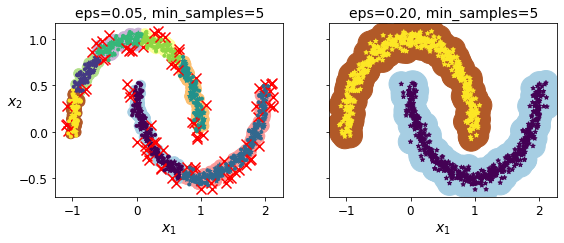

In [12]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()
